<a href="https://colab.research.google.com/github/cccg8105/notebook_AD/blob/master/Frecuencia%20inscripciones/ModeloAutoregresivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo autoregresivo

Permite modelar series estacionarias

## Carga de información

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
# carga de archivo
raw_csv_data = pd.read_csv("https://raw.githubusercontent.com/cccg8105/notebook_AD/master/Frecuencia%20inscripciones/data/conversionesPE.csv", index_col=0)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Transformación y formateo de datos
 

In [2]:
# Transformacion de datos para analisis temporal
df = raw_csv_data.copy()
df=df[df.FuenteIngreso == "UB"]
df['Fecha'] = pd.to_datetime(raw_csv_data.FechaConsultora, dayfirst = True)
df['inscripciones'] = df.cantidad
del df['FuenteIngreso']
del df['Pais']
del df['FechaConsultora']
del df['cantidad']
# se agrupa y se reindexa el dataframe
df = df.groupby(['Fecha']).sum().reset_index()
df.set_index('Fecha', inplace=True, verify_integrity=True)
# establecer frecuencia
#df.sort_index().asfreq(freq='d')
df.index = pd.DatetimeIndex(df.index).to_period('d')
# cambiar frecuencia a meses
#df.index.freq = 'MS'
df.head()
dfAR = df.copy()

## Autoregresión (AR)

### Autocorrelación (ACF)

Autocorrelación: Existe correlación positiva entre la autocorrelación con periodos de hasta mas de 50 días. Asimismo se están considerando efectos directos e indirectos de los períodos pasados.

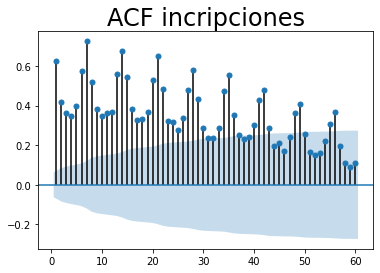

In [3]:
sgt.plot_acf(df.inscripciones, lags = 60, zero = False)
plt.title("ACF incripciones", size = 24)
plt.show()

### Autocorrelación Parcial (PACF)

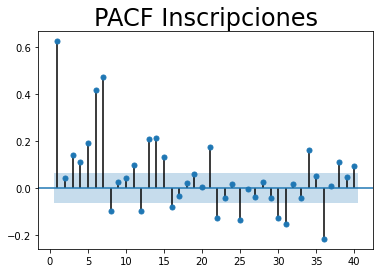

In [4]:
sgt.plot_pacf(df.inscripciones, lags = 40, zero = False, method = ('ols'))
plt.title("PACF Inscripciones", size = 24)
plt.show()